In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# Create Engine
engine = create_engine("sqlite:///Resources/combined_attacks.sqlite")
conn = engine.connect()

In [5]:
# Run a test query
query = """SELECT * 
        FROM combined_attacks"""
df = pd.read_sql(query, conn)
df.head()

,case_number,date,year,attack_type,country,area,location,activity,name,sex,...,original_order,unnamed_22,unnamed_23,animal_type,count,latitude,longitude,details,month,day
0,2019.08.27,2019-08-27,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6452.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
1,2019.08.21,2019-08-21,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,6451.0,None,None,shark,6.0,26.122308,-80.143379,None,NaN,NaN
2,2019.08.20,2019-08-20,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,6450.0,None,None,shark,1.0,41.635587,-82.837600,None,NaN,NaN
3,2019.08.16,2019-08-16,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,6449.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
4,2019.08.11,2019-08-11,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,6448.0,None,None,shark,1.0,21.476965,-158.220908,None,NaN,NaN


In [6]:
# Run another test query
query = """SELECT age, count(*) as count 
        FROM combined_attacks
        GROUP BY age
        ORDER BY count DESC;
        """
df = pd.read_sql(query, conn)
df.head()

,age,count
0,NaN,749
1,16.0,71
2,15.0,68
3,19.0,67
4,17.0,67


## Adding EDA SQL

### Q1. Whether Attacks have increased/decreased over time?

In [29]:
animal_type_param = 'shark'
sex_param = 'M'

query = f"""
        SELECT cast(year as int) as year, count(year) as attacks
        FROM combined_attacks
        WHERE year <> 'NaN'
        AND animal_type = '{animal_type_param}'
        AND sex = '{sex_param}'
        GROUP BY year
        ORDER BY year;
        """

df = pd.read_sql(query, conn)
df.head()

,year,attacks
0,1900,5
1,1901,1
2,1902,3
3,1903,2
4,1904,2


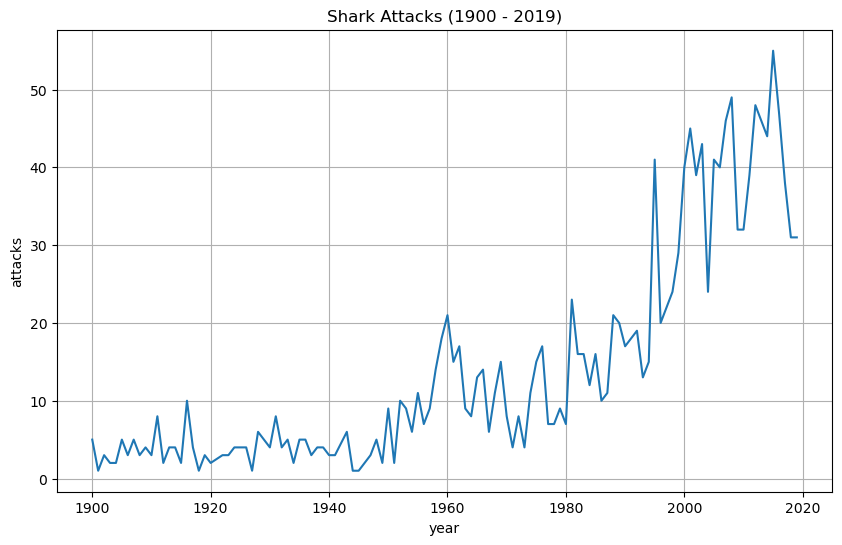

In [30]:
plt.figure(figsize = (10,6))
plt.plot(df['year'], df['attacks'])
plt.title('Shark Attacks (1900 - 2019)')
plt.xlabel('year')
plt.ylabel('attacks')

plt.grid()
# df.plot(title = 'Shark Attacks (1900 - 2019)', xlabel = 'year', ylabel = 'attacks')

# plt.grid()

### Q2. What are the main places of Attacks?

In [51]:
animal_type_param = 'shark'
sex_param = 'M'

query = f"""
        SELECT location, -- || ', ' || area || ', ' || country  as location, 
        count(year) as attacks
        FROM combined_attacks
        WHERE year <> 'NaN'
        AND animal_type = '{animal_type_param}'
        AND sex = '{sex_param}'
        GROUP BY location
        ORDER BY location desc
        LIMIT 20;
        """

df = pd.read_sql(query, conn)
df.head()

,location,attacks
0,"off Grand Lake, Cameron Parish",1
1,"a pier at the end of Caxambas Drive, Marco Island",1
2,"Zuma Beach, Santa Monica, Los Angeles County",1
3,"Wrightsville Beach, New Hanover County",3
4,Wrightsville Beach,1


<Figure size 1600x600 with 0 Axes>

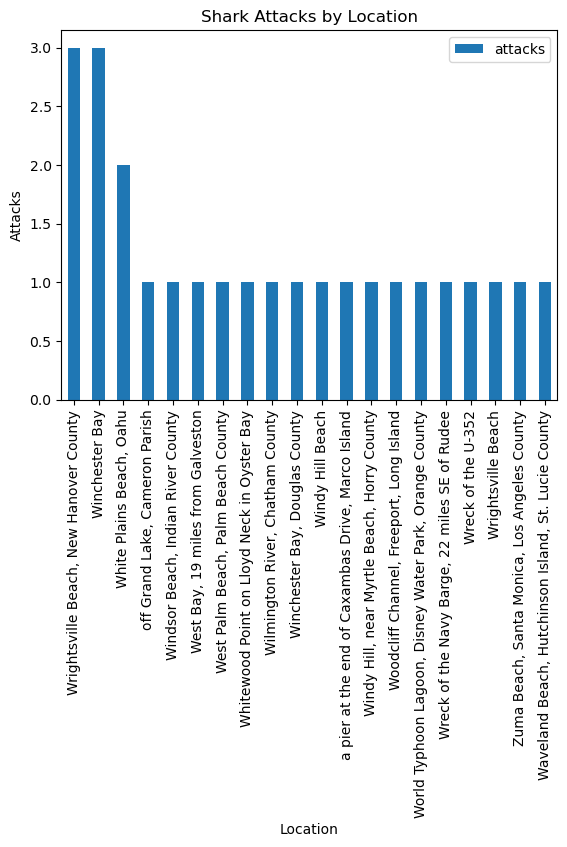

In [57]:
#country	area	location
plt.figure(figsize=(16, 6))
df_sorted = df.sort_values('attacks', ascending=False)
df_sorted.plot(x='location', y='attacks', kind='bar', title='Shark Attacks by Location', xlabel='Location', ylabel='Attacks')
plt.show()